# 0: Install Dependencies

In [1]:
import pandas as pd
import datetime
import numpy as np


# from matplotlib.backends.backend_pgf import FigureCanvasPgf
import matplotlib.pyplot as plt
import matplotlib

import spacy
 
from langdetect import detect
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [29]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [5]:
#https://realpython.com/sentiment-analysis-python/

In [6]:
# nltk dependency
# python -m nltk.downloader all

# 1: Preprocessing 

## 1.1: Load Raw Data

In [7]:
training_df = pd.read_csv('train.csv', header=None, names=['Rating', 'Title', 'Review'])
testing_df = pd.read_csv('test.csv', header=None, names=['Rating', 'Title', 'Review'])

### 1.1.5: Remove Non-English Reviews

## TODO
    - Try to get this to work

In [8]:
print("Language: ", detect('Hello, simple english review because I like reviewing products in english!'))
print("Language: ", detect('Avez-vous déjà vu un CD double et un DVD avec'))

Language:  en
Language:  fr


In [9]:
training_df['Language'] = detect(str(training_df['Review']))
testing_df['Language'] = detect(str(testing_df['Review']))

In [10]:
# training_df.head()

In [11]:
# testing_df.head()

In [12]:
non_english_mask = (training_df['Language'] == 'en')
training_df = training_df[non_english_mask]

non_english_mast = (testing_df['Language'] == 'en')
testing_df = testing_df[non_english_mask]

In [13]:
training_df['Language'].unique()

array(['en'], dtype=object)

In [14]:
testing_df['Language'].unique()

array(['en'], dtype=object)

In [15]:
len(training_df)

3000000

In [16]:
len(testing_df)

650000

Evaluate Rating Distribution

In [17]:
print(training_df['Rating'].unique())

[3 5 4 1 2]


In [18]:
# import pdflatex
from matplotlib.backends import backend_pgf
# matplotlib.use('pgf')
# plt.rc('pgf', texsystem='pdflatex')

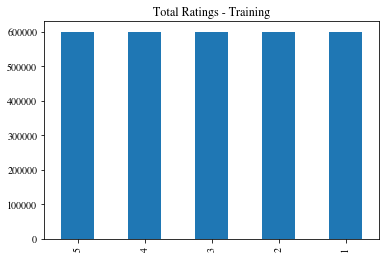

In [19]:
plt.title('Total Ratings - Training')
training_df['Rating'].value_counts().plot.bar()
# plt.savefig('Ratings Distribution.png')
# plt.savefig('Ratings Distribution.pgf', format = 'pgf')
plt.savefig('Ratings Distribution.pdf')


# import tikzplotlib
# tikzplotlib.save("Ratings Distribution.tex")

plt.show()

In [20]:
# testing_df['Rating'].value_counts().plot.bar()
# plt.show()

Evaluate Length of Reviews

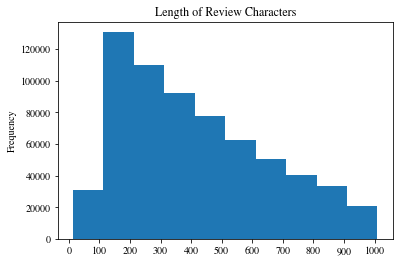

In [21]:
plt.title("Length of Review Characters")
testing_df['Review'].str.len().plot.hist(bins = 10)
plt.xticks(np.linspace(0, 1000, 11))
# plt.savefig('Review Length Hist.png')
plt.savefig('Review Length Hist.pdf')
plt.show()

# 1.2: Tokenization (sentence vs word tokenization)
- Tokenize each element in 'review' column
- Filter out symbols
- Filter out stop words

In [22]:
def remove_punc(text):
    result_text = text.translate(str.maketrans('', '', string.punctuation))
    return result_text

s = r'This model may be ok for sedentary types, but I\'m active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment! '
remove_punc(s)

'This model may be ok for sedentary types but Im active and get around alot in my job  consistently found these stockings rolled up down by my ankles Not Good Solution go with the standard compression stocking 2030 stock 114622 Excellent support stays up and gives me what I need Both pair of these also tore as I struggled to pull them up all the time Good riddancebad investment '

In [23]:
def remove_nums(text):
    result_text = ''.join([i for i in text if not i.isdigit()])
    return result_text

remove_nums(remove_punc(s))

'This model may be ok for sedentary types but Im active and get around alot in my job  consistently found these stockings rolled up down by my ankles Not Good Solution go with the standard compression stocking  stock  Excellent support stays up and gives me what I need Both pair of these also tore as I struggled to pull them up all the time Good riddancebad investment '

In [24]:
import re
def remove_spaces(text):
    result_text = re.sub(' +', ' ', text)
    return result_text

remove_spaces(remove_nums(remove_punc(s)))

'This model may be ok for sedentary types but Im active and get around alot in my job consistently found these stockings rolled up down by my ankles Not Good Solution go with the standard compression stocking stock Excellent support stays up and gives me what I need Both pair of these also tore as I struggled to pull them up all the time Good riddancebad investment '

In [25]:
remove_spaces(remove_nums(remove_punc(s))).lower()

'this model may be ok for sedentary types but im active and get around alot in my job consistently found these stockings rolled up down by my ankles not good solution go with the standard compression stocking stock excellent support stays up and gives me what i need both pair of these also tore as i struggled to pull them up all the time good riddancebad investment '

In [26]:
def remove_stop_words(text):

    r_start_time = datetime.datetime.now()
    
    nlp = spacy.load('en_core_web_sm')
    text_list = nlp(text)
    
#     stop_list = ['a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'for', 'if', 'in', 'into', 'is', 'it', 'no', 'not',
#                  'of', 'on', 'or', 'such', 'that', 'the', 'their', 'then', 'there', 'these', 'they', 'this', 'to', 'was', 
#                  'will', 'with']
    
    temp_list = []
    for token in text_list:
        if not token.is_stop:
            temp_list.append(token)
    
    str_output = ' '.join([str(elem) for elem in temp_list])

    r_end_time = datetime.datetime.now()
#     print('remove_stop_words runtime: ', r_end_time - r_start_time)
    
    return str_output    
    
remove_stop_words(remove_spaces(remove_nums(remove_punc(s))).lower())

remove_stop_words runtime:  0:00:00.789076


'model ok sedentary types m active alot job consistently found stockings rolled ankles good solution standard compression stocking stock excellent support stays gives need pair tore struggled pull time good riddancebad investment'

In [27]:
def remove_stop_words_nltk(text):
#     r_start_time = datetime.datetime.now()
    
    all_stopwords = stopwords.words('english')
    all_stopwords.append('play')

    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
    str_output = ' '.join([str(elem) for elem in tokens_without_sw])
    
    
    
#     r_end_time = datetime.datetime.now()
#     print('\n Runtime: ', r_end_time - r_start_time)
    
#     print(str_output)
    return(str_output)
    
# remove_stop_words_nltk(s)

# 3: Normalization (Root Word Extraction)
- Stemming vs Lemmatization
- Normalize each element in 'reviews' 

In [108]:
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_sentence_simple(sentence):
    
    temp_list = []
    for word in nltk.word_tokenize(sentence):
        temp_list.append(lemmatizer.lemmatize(word))
        
    
    return ' '.join([str(elem) for elem in temp_list])


def lemmatize_sentence_pos(sentence):
    
    temp_list = []
    for word in nltk.word_tokenize(sentence):
        temp_list.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
#         temp_list.append(lemmatizer.lemmatize(word))
        
    
    return ' '.join([str(elem) for elem in temp_list])




word = 'feet'
# print(lemmatizer.lemmatize(word, get_wordnet_pos(word)))


sentence = "The striped bats are hanging on their feet"

print("Before Lemmatization:       ", sentence)
print("\nAfter Simple Lemmatization: ", lemmatize_sentence_simple(sentence))
print("\nAfter POS Lemmatization:    ", lemmatize_sentence_pos(sentence))

Before Lemmatization:        The striped bats are hanging on their feet

After Simple Lemmatization:  The striped bat are hanging on their foot

After POS Lemmatization:     The strip bat be hang on their foot


### Def preprocess
    # output list = []
    # for element in row
        # text = row's text
        # output text = remove_punctuation(text)
        # output text = remove_numbers(output text)
        # output text = lowercase(output text)
        # output text = remove_stop words(output text)
        # output list.append(output text )
    # return output list 

In [109]:
# Parsing

def process_column(unprocessed_list, total_items):
    output_list = []
    count = 0
    for item in unprocessed_list:
        if item != ' ':            
            #No Lemma
#             output_list.append( remove_nums(remove_punc(remove_stop_words_nltk(item))).lower()  )


            #Simple
#             output_list.append( remove_nums(remove_punc(lemmatize_sentence_simple(remove_stop_words_nltk(item)))).lower()  )

        
            #POS
            output_list.append( remove_nums(remove_punc(lemmatize_sentence_pos(remove_stop_words_nltk(item)))).lower()  )
        
        else:
            output_list.append(' ')
        
        count += 1
        
        if count % 10000 == 0:
            print("{:.2%}".format(count / total_items))
        
    return output_list


start_time = datetime.datetime.now()



total_items = 50000
test_raw_reviews = testing_df['Review'].tolist()
test_processed_reviews = process_column(test_raw_reviews[:total_items], total_items)



end_time = datetime.datetime.now()
print("POS Lemma, total items: ", total_items, "\nRuntime: ", end_time - start_time)
# print('with POS lemma: 0:01:17.570621')
# print('Lemma W/o POS: ')

20.00%
40.00%
60.00%
80.00%
100.00%
POS Lemma, total items:  50000 
Runtime:  0:30:39.555161


In [ ]:
# test_processed_reviews

In [110]:
print('---------- Review 1 ----------')
print('Raw: ', test_raw_reviews[0], '\n\n')
print('Processed: ', test_processed_reviews[0])
print('\n')
print('---------- Review 2 ----------')
print('Raw: ', test_raw_reviews[2], '\n\n')
print('Processed: ', test_processed_reviews[2])

---------- Review 1 ----------
Raw:  This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment! 


Processed:  this model may ok sedentary type  i m active get around alot job  consistently found stocking roll ankle  not good   solution  go standard compression stock    stock    excellent support  stay give i need  both pair also tore i struggle pull time  good riddancebad investment 


---------- Review 2 ----------
Raw:  I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I r

## TODO 
    - Remove single character tokens (i.e. 'a' or 'i')

# 4: Vectorization
- Vectorize each token of 'reviews' 
- Save vectorized reviews data

In [ ]:
sample_df = pd.DataFrame()
sample_df['Targets'] = testing_df['Rating'].tolist()[:total_items]
sample_df['Processed Text'] = test_processed_reviews
print("only first", total_items, "samples of validation data")
sample_df.head()

## TODO 
    - Use from gensim.models import word2vec
    - Try to compare results withthe Keras Tokenizer and Keras Pad_Sequences modules 
    - Obviously select best from these
    - Here ultimate goal is to obtain an array (1, 100) shape, then put this into a df with the true label
    - Then use PCA to reduce 100 dimensions to 2 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(sample_df['Processed Text'].values)

X = tokenizer.texts_to_sequences(sample_df['Processed Text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length

y = sample_df['Targets'].tolist()

In [ ]:
y = pd.get_dummies(sample_df['Targets']).values
# [print(sample_df['Targets'][i], y[i]) for i in range(0,15)]
y

## TODO
    - Use PCA or maybe a different dimensionality reduction technique to get a 1,2 input vector

## TODO 
    - After PCA plot the output values and label each class with a certain color to determine if the data is linearly seperable (it shouldn't be) 
    - Also u can use T-SINE from sklearn to scatterplot certain wrods 

***

# 5: Classification
- Create classifier for vectorized data
- TensorFlow (Google, more DIY, more customizable/complex, bit more powerful with steeper learning curve)
- PyTorch (Facebook's version of TF, comperable to tf, apparently it's slightly easier to pick up)
- Scikit Learn (Extremely simple in comparison to tf and pytorch) 
- spaCy also has a text classifier if we want to use that 
- 
    #### 5.1
    - Split into training/test sets
    - Likely 80/20
- 
    #### 5.2
    - Model selection
- 
    #### 5.3
    - Train model
- 
    #### 5.4
    - Evaluate performance
- 
    #### 5.5
    - Tweak parameters
    - Potentially include hyperparameters
- 
    #### 5.6
    - Generate predictions
    - Vector from (-1.0, 1.0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout

model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
batch_size = 64
epochs = 4

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)

In [ ]:
# "{:.2%}".format(predictions[i])

In [ ]:
predictions = model.predict(X_test)

[print('Text: ', sample_df['Processed Text'][i], '\nPredicted Output: ', predictions[i], '\nTrue Classification: ', y_test[i], '\n\n') for i in range(0, 10)]

In [ ]:
predictions

## TODO 
    - INclude sklearn metrics (Accuracy & F1)
    - Other Algos (Random Forest maybe) 
    - Thicccccccc confusio matrix (before & after cross validation)
    - Cross Validation
    - Plot Learning Rate vs Loss somehow (look at the repo with the lm model)
    - Figure out how to compare simple ML model (i.e. DT) vs ANN model (i.e. RNN or something else) 

# Evaluate with sample review

In [ ]:
# dummy_review = 'This is the best water bottle I have ever used. I love that it is BPA free and great on the environment. I think that everyone who is looking for a good water bottle should buy this one, it is absolutley perfect and totally what I am looking for. I love it!'
dummy_review = 'I absolutley love this product, it is everything that I expected. The quality is unbeatable for the price. This product is amazing. I could not reccomend this product more!'
dummy_review

In [ ]:
dummy_processed = [remove_nums(remove_punc(remove_stop_words(dummy_review))).lower()]
dummy_processed

In [ ]:
#Reshape to correct input size 

dummy_vectorized = tokenizer.texts_to_sequences(dummy_processed)
dummy_vectorized = np.concatenate( ( np.zeros((1, (len(X[0]) - len(dummy_vectorized[0]))))[0]  , (dummy_vectorized[0]) )  )
dummy_vectorized = np.asarray(dummy_vectorized)
dummy_vectorized = np.expand_dims(dummy_vectorized, axis = 0)
dummy_vectorized.shape

In [ ]:
model.predict(dummy_vectorized)